<a href="https://colab.research.google.com/github/vvshyer/tensorflow2.0_learning/blob/master/tf_keras_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.3
pandas 0.24.2
sklearn 0.21.1
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


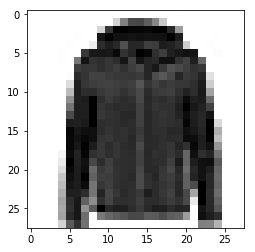

In [0]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
    
show_single_image(x_train[0])

In [0]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols*1.4, n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']


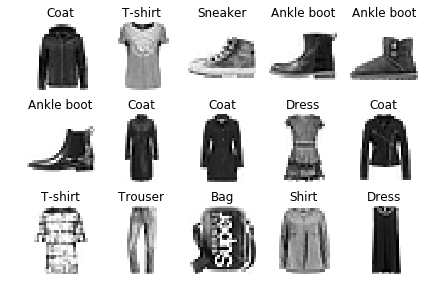

In [0]:
show_imgs(3, 5, x_train, y_train, class_names)

In [0]:
# tf.keras.models.Sequential()
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# relu: y=max(0, x)
# softmax: 将向量变为概率分布. x = [x1, x2, x3]
#          y = [e^x1/sum, e^x2/sum, e^x3/sum]
#          sum = e^x1 + e^x2 + e^x3

# 第二种Sequential使用方式：
# model = keras.model.Sequential([
#     keras.layers.Flatten(input_shape = [28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])


# sparse的原因：因为y->index.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = 'sgd',
              metrics = ['accuracy'])


In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 第一层: [None, 784] * W + b -> [None, 300]
# W.shape [784, 300], b.shape = [300, 1]

In [0]:
history = model.fit(x_train, y_train, epochs = 10,
          validation_data = (x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 107us/sample - loss: 3.6217 - accuracy: 0.6184 - val_loss: 0.8330 - val_accuracy: 0.7034
Epoch 2/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.7370 - accuracy: 0.7038 - val_loss: 0.7376 - val_accuracy: 0.7190
Epoch 3/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.6747 - accuracy: 0.7195 - val_loss: 0.6743 - val_accuracy: 0.7400
Epoch 4/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.6322 - accuracy: 0.7425 - val_loss: 0.6189 - val_accuracy: 0.7732
Epoch 5/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.5844 - accuracy: 0.7784 - val_loss: 0.5872 - val_accuracy: 0.7922
Epoch 6/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.5505 - accuracy: 0.7924 - val_loss: 0.5871 - val_accuracy: 0.7980
Epoch 7/10
55000/55000 [============================

In [0]:
type(history)

tensorflow.python.keras.callbacks.History

In [0]:
history.history

{'accuracy': [0.6184,
  0.7038,
  0.71952724,
  0.7424727,
  0.77836365,
  0.79236364,
  0.8058182,
  0.81567276,
  0.8234364,
  0.8285091],
 'loss': [3.6217354177128187,
  0.737037527552518,
  0.6747083189704202,
  0.6321580974665555,
  0.5844484705058011,
  0.5504864022818479,
  0.5239874147198417,
  0.5009088442065499,
  0.47904718188372525,
  0.46369601648504083],
 'val_accuracy': [0.7034,
  0.719,
  0.74,
  0.7732,
  0.7922,
  0.798,
  0.805,
  0.8056,
  0.8162,
  0.8202],
 'val_loss': [0.8329788307189941,
  0.7376028469085694,
  0.6742705291748047,
  0.6188737306118012,
  0.5871880910873413,
  0.587092352104187,
  0.5491470623016358,
  0.572897251701355,
  0.5237925946235656,
  0.5243386300086975]}

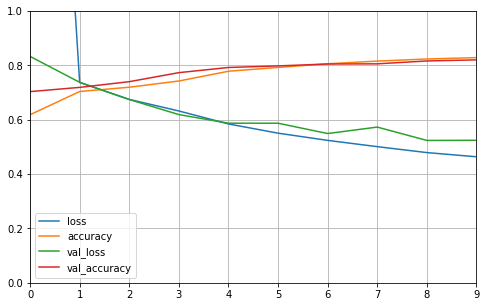

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)